# Titanic Dataset

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full_dataset = pd.read_csv("datasets/titanic/train.csv")
full_dataset.shape

(891, 12)

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(full_dataset, test_size=0.2)

# Creating a copy for exploration

titanic_exp = train_set.copy()
titanic_exp.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S


In [4]:
titanic_exp.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.00,712.00,712.00,567.00,712.00,712.00,712.00
mean,445.21,0.39,2.30,29.90,0.52,0.38,31.07
std,257.49,0.49,0.83,14.76,1.09,0.80,47.11
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,218.75,0.00,2.00,20.00,0.00,0.00,7.92
50%,446.50,0.00,3.00,28.00,0.00,0.00,14.46
75%,671.25,1.00,3.00,39.00,1.00,0.00,30.50
max,891.00,1.00,3.00,80.00,8.00,5.00,512.33


In [5]:
titanic_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 868 to 394
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          567 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [6]:
titanic_exp.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            145
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          551
Embarked         1
dtype: int64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

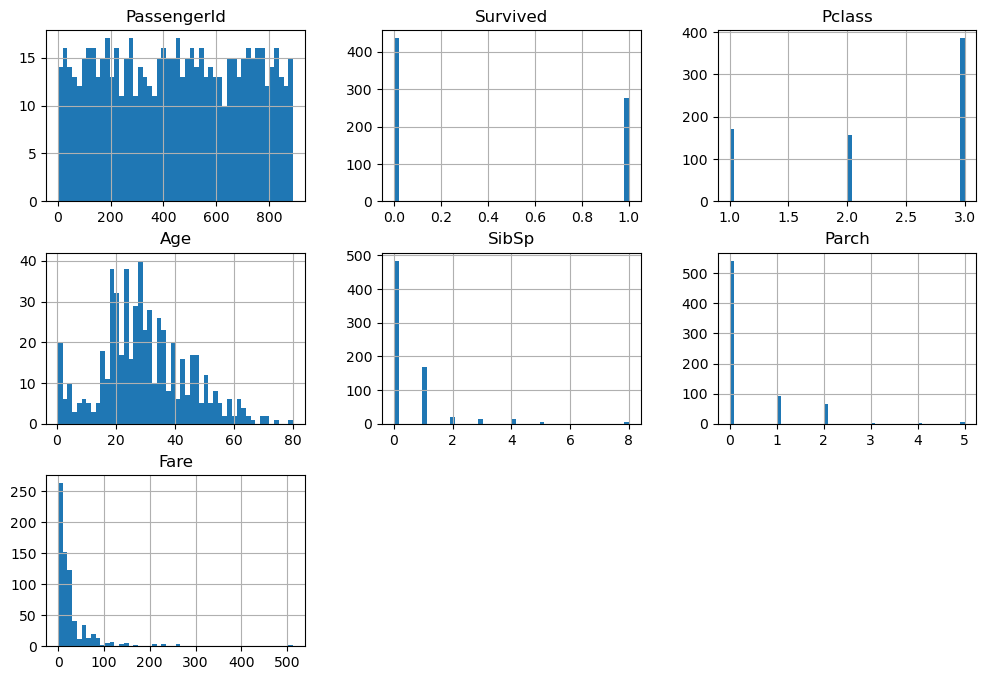

In [7]:
titanic_exp.hist(bins=50, figsize=(12, 8))

In [8]:
corr_matrix = titanic_exp.corr()
corr_matrix["Survived"]

PassengerId    0.010540
Survived       1.000000
Pclass        -0.334756
Age           -0.087173
SibSp         -0.035088
Parch          0.094043
Fare           0.256738
Name: Survived, dtype: float64

## Cleaning the Data

In [9]:
train_dataset = train_set.copy()

In [10]:
train_dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


In [11]:
red_train_dataset = train_dataset.drop(["Name", "PassengerId", "Ticket", "Cabin"], axis=1)
red_train_dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
868,0,3,male,NaN,0,0,9.5000,S
527,0,1,male,NaN,0,0,221.7792,S


### Missing Data

In [12]:
red_train_dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         145
SibSp         0
Parch         0
Fare          0
Embarked      1
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

num_set = red_train_dataset[["Survived", "Age", "Fare"]]
imputer.fit(num_set)

X = imputer.transform(num_set)
titanic_num_data = pd.DataFrame(X, columns=num_set.columns, index=num_set.index)
titanic_num_data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [14]:
# Estas dos las voy a tratar como numericos pero utilizando la strategy del más común en vez de la mediana

red_train_dataset["Parch"].value_counts()
red_train_dataset["SibSp"].value_counts()

imputer = SimpleImputer(strategy="most_frequent")

num_set = red_train_dataset[["Parch", "SibSp"]]
imputer.fit(num_set)

X = imputer.transform(num_set)
titanic_num_freq = pd.DataFrame(X, columns=num_set.columns, index=num_set.index)
titanic_num_freq.isnull().sum()

Parch    0
SibSp    0
dtype: int64

In [15]:
# OneHotEncoding para categógicos

from sklearn.preprocessing import OneHotEncoder

titanic_cat = red_train_dataset[["Pclass", "Sex", "Embarked"]]

onehotencoder = OneHotEncoder(sparse_output=False)
titanic_1hot = onehotencoder.fit_transform(titanic_cat)

titanic_1hot_df = pd.DataFrame(titanic_1hot, columns=onehotencoder.get_feature_names_out(), index=titanic_cat.index)
titanic_1hot_df.head(2)

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
868,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
527,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Let's see if we can transform some variables to make them more "normal" distributed

In [16]:
# No parece que vaya bien, aplicar el log a la variable Fare, aparte del problema de los infinitos

## Transformation Pipelines

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a custom transformer to delete unnecesary columns

class ColDropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        self.X_copy = X.drop(["Name", "PassengerId", "Ticket", "Cabin"], axis=1)
        return self.X_copy 

        

In [68]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

test_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

train_copy = train_set.copy()

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

col_transformer = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

preprocessing = make_pipeline(ColDropper(), col_transformer)

preprocessed_train = preprocessing.fit_transform(train_copy)

preprocessed_df = pd.DataFrame(preprocessed_train, columns=preprocessing[1].get_feature_names_out(), index=train_copy.index)
preprocessed_df

,pipeline-1__Survived,pipeline-1__Pclass,pipeline-1__Age,pipeline-1__SibSp,pipeline-1__Parch,pipeline-1__Fare,pipeline-2__Sex_female,pipeline-2__Sex_male,pipeline-2__Embarked_C,pipeline-2__Embarked_Q,pipeline-2__Embarked_S
868,-0.795630,0.841364,-0.115020,-0.481697,-0.477899,-0.458146,0.0,1.0,0.0,0.0,1.0
527,-0.795630,-1.569305,-0.115020,-0.481697,-0.477899,4.051083,0.0,1.0,0.0,0.0,1.0
545,-0.795630,-1.569305,2.616059,-0.481697,-0.477899,-0.107654,0.0,1.0,0.0,0.0,1.0
514,-0.795630,0.841364,-0.418473,-0.481697,-0.477899,-0.500719,0.0,1.0,0.0,0.0,1.0
482,-0.795630,0.841364,1.553972,-0.481697,-0.477899,-0.488947,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
607,1.256865,-1.569305,-0.190884,-0.481697,-0.477899,-0.012065,0.0,1.0,0.0,0.0,1.0
841,-0.795630,-0.363971,-1.025380,-0.481697,-0.477899,-0.436904,0.0,1.0,0.0,0.0,1.0
688,-0.795630,0.841364,-0.873653,-0.481697,-0.477899,-0.494347,0.0,1.0,0.0,0.0,1.0
189,-0.795630,0.841364,0.491886,-0.481697,-0.477899,-0.492223,0.0,1.0,0.0,0.0,1.0


## Logistic Regression

In [89]:
# from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

train_set_copy = train_set.copy()
X = train_set_copy.drop(["Survived"], axis=1)
y = train_set_copy["Survived"]
final_train = preprocessing.fit_transform(X)
final_train = pd.DataFrame(final_train, columns=preprocessing[1].get_feature_names_out(), index=X.index)

log_reg.fit(final_train, y)

predictions = log_reg.predict(final_train)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, predictions)
accuracy

0.7837078651685393